In [ ]:
!pip install onedrivedownloader
!pip install tensorflow pandas numpy matplotlib scikit-learn

In [ ]:
!pip install onedrivedownloader
!pip install tensorflow pandas numpy matplotlib scikit-learn

Tamaño total del dataset antes de limpieza: 442
Valores únicos en 'GENERO' después de conversión: [0 1]
Tamaño total después de eliminar valores NaN: 442
Datos antes de la división: X=(442, 11), y=(442,)
Datos de entrenamiento: (353, 11), Datos de validación: (89, 11)
Epoch 1/300


<ipython-input-53-acdcf6874239>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2002.8790 - mae: 36.0022 - val_loss: 729.7892 - val_mae: 20.7301
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 812.0598 - mae: 22.5207 - val_loss: 607.9159 - val_mae: 20.3032
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 578.3892 - mae: 19.0184 - val_loss: 502.0028 - val_mae: 18.3629
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 494.7536 - mae: 17.3282 - val_loss: 402.7640 - val_mae: 16.1693
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 403.9609 - mae: 15.6867 - val_loss: 358.3332 - val_mae: 15.6295
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 365.9402 - mae: 15.1587 - val_loss: 289.6671 - val_mae: 14.0137
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264.9026 - mae: 12.6010 - val_loss: 254.8703 - val_mae: 13.2761
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 224.4494 - mae: 11.8208 - val_loss: 195.6863 - val_mae: 11.5629
Epoch 9/300
18/18 ━━━

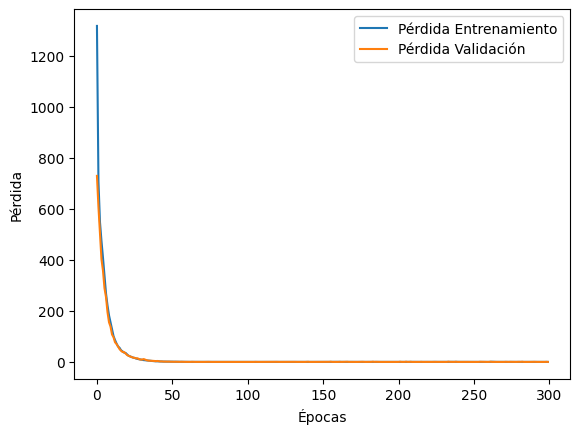

Hiperparámetros guardados en 'hyperparameters.json'


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from onedrivedownloader import download

# 1. Descargar el dataset desde SharePoint
link = "https://unimilitareduco-my.sharepoint.com/:x:/g/personal/diego_renza_unimilitar_edu_co/Edrscd9HZAJKv82wAqWMdlEBi7S6tM-iD9qb6OrVxgl9HQ?e=yqG6Lq"
download(link, filename="diagnostico.xlsx")

# 2. Cargar el dataset en un DataFrame
df = pd.read_excel("diagnostico.xlsx")

# 3. Mostrar el tamaño del dataset antes de la limpieza
print(f"Tamaño total del dataset antes de limpieza: {len(df)}")

# 4. Limpieza y ajuste de datos a valores numéricos
if 'GENERO' in df.columns:
    df['GENERO'] = df['GENERO'].map({'MASCULINO': 0, 'FEMENINO': 1})
    print("Valores únicos en 'GENERO' después de conversión:", df['GENERO'].unique())

df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
df = df.dropna()

print(f"Tamaño total después de eliminar valores NaN: {len(df)}")

# 5. Seleccionar características de entrada (X) y etiqueta (y)
X = df.iloc[:, :-1].values  # Todas las columnas excepto la última
y = df.iloc[:, -1].values   # Última columna como variable objetivo

print(f"Datos antes de la división: X={X.shape}, y={y.shape}")

# 6. Dividir el dataset en 80% entrenamiento y 20% prueba sin aleatorización
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Datos de entrenamiento: {X_train.shape}, Datos de validación: {X_test.shape}")

# 7. Definir el modelo de regresión lineal en TensorFlow
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='linear')
])

# 8. Configurar el optimizador y función de pérdida
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mae'])

# 9. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=300, batch_size=20, validation_data=(X_test, y_test))

# 10. Evaluar el modelo
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Error en validación (MAE): {test_mae}")

# 11. Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 12. Guardar los hiperparámetros finales en JSON
import json
final_hyperparameters = {
    'optimizer': 'Adam',
    'learning_rate': 0.01,
    'epochs': 300,
    'batch_size': 20,
    'loss_function': 'mse'
}

with open("hyperparameters.json", "w") as f:
    json.dump(final_hyperparameters, f)

print("Hiperparámetros guardados en 'hyperparameters.json'")
